<div class="alert alert-success">

    
## Файлы

Файл – именованная область постоянной памяти в компьютере. 
    
Встроенная функция **open** создает объект файла, который обеспечивает связь с файлом, размещенным в компьютере. После вызова функции **open** можно выполнять операции чтения и записи во внешний файл, используя методы полученного объекта.
    
Они не являются ни числами, ни последовательностями или отображениями – для задач работы с файлами они предоставляют
одни только методы. 
    
Большинство методов файлов связаны с выполнением операций ввода-вывода во внешние файлы, ассоциированные с объектом, но
существуют также методы, которые позволяют переходить на другую позицию в файле, выталкивать на диск буферы вывода и так далее.    
    
</div>

 <div class="alert alert-danger">
 Данные, получаемые из файла, всегда попадают в сценарий в виде строки, поэтому необходимо выполнять преобразование данных в другие типы объектов языка Python. Точно так же, при выполнении операции записи данных в файл, в отличие от инструкции print,
интерпретатор Python не выполняет автоматическое преобразование объектов в строки – необходимо передавать методам уже сформированные строки. 
    </div>

### Операции над файлами

| Операция                        | Интерпретация                                            |
|:---------------------------------|:----------------------------------------------------------|
| output = open(r’C:\spam’, ‘w’)  | Открывает файл для записи (‘w’ означает write – запись)  |
|input = open(‘data’, ‘r’)        | Открывает файл для чтения (‘r’ означает read – чтение)|
|input = open(‘data’)|Открывает файл для чтения (по-умолчанию)|
|aString = input.read()|Чтение файла целиком в единственную строку|
|aString = input.read(N)|Чтение файла целиком в единственную строку|
|aString = input.readline()|Чтение следующей текстовой строки (включая символ конца строки) в строку|
|aList = input.readlines()|Чтение файла целиком в список строк (включая символ конца строки)|
|output.write(aString)|Запись строки символов (или байтов) в файл|
|output.writelines(aList)|Запись всех строк из списка в файл|
|output.close()|Закрытие файла вручную (выполняется пооко нчании работы с файлом)|
|for line in open(‘data’): операции над line|Итерации по файлу, построчное чтение|
|open(‘f.txt’, encoding=’utf-8’)|Файлы с текстом Юникода в Python 3.0 (строки типа str)|

Оба аргумента функции **open** должны быть строками. Если путь к файлу не указан, предполагается, что он находится в текущем рабочем каталоге (то есть в каталоге, где был запущен сценарий).

### Режимы открытия файла

| Операция                        | Интерпретация                                            |
|:---------------------------------|:----------------------------------------------------------|
| r  | Чтение из файла   |
|t|Открыть как текстовый файл|
|w|Запись в файл и создание файла, если его не существует|
|x|Запись в файл и вызовы исключения, если файла не существует|
|b|Открыть как двоичный файл|
|a|Запись в файл путем добавления новых значений в конец|
|+|Работа в режиме чтения и записи|

### Примеры работы с файлами

#### Запись в файл

*Записать в файл poem.txt строку*

Для работы будет использоваться **менеджер контекста**.


**Менеджер контекста** — это объект, который управляет контекстом в Python. Он выполняет предварительные и завершающие действия, чтобы войти и выйти из контекста. 

Контекстом в данном случае является работа с файлом, поэтому менеджер контекста открывает файл при входе в блок **with** и закрывает файл при выходе из блока.

In [1]:
with open('poem.txt', 'w', encoding='utf-8') as f:
    data = 'Я помню чудное мгновение: \n'
    f.write(data)

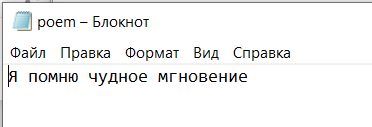

In [2]:
f = open('poem1.txt', 'w', encoding='utf-8')
data = 'Я помню чудное мгновение: \n'
f.write(data)
f.close()

Комбинация символов **\n** называется управляющий символ **Возврат каретки**, предписывающий перейти на новую строку. Если этого не сделать, то все будет выводится в одну строку

*продолжение*

*Дописать в файл продолжение стихотворения:*

Я помню чудное мгновенье:

Передо мной явилась ты,

Как мимолетное виденье,

Как гений чистой красоты.

In [3]:
poem_lst = ['Передо мной явилась ты,\n', 'Как мимолетное виденье,\n', 'Как гений чистой красоты.\n']
# Открытие файла в режиме дозаписи
with open('poem.txt', 'a', encoding='utf-8') as f:
    # Запись в конец файла всех строк из списка
    f.writelines(poem_lst)

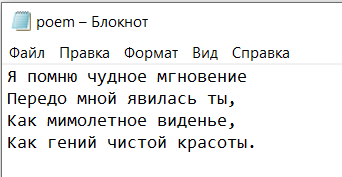

#### Чтение из файла

##### read()

Содержимое всего файла читается в одну строку.

In [4]:
input1 = open('poem.txt', 'r', encoding='utf-8')
#  Чтение файла в одну строку
data = input1.read()
print(data)
input1.close()

Я помню чудное мгновение: 
Передо мной явилась ты,
Как мимолетное виденье,
Как гений чистой красоты.



In [5]:
data

'Я помню чудное мгновение: \nПередо мной явилась ты,\nКак мимолетное виденье,\nКак гений чистой красоты.\n'

In [6]:
# Открытие файла в режиме чтения
with open('poem.txt', 'r', encoding='utf-8') as f:
    #  Чтение файла в одну строку
    data = f.read()

print(data)

Я помню чудное мгновение: 
Передо мной явилась ты,
Как мимолетное виденье,
Как гений чистой красоты.



In [7]:
data

'Я помню чудное мгновение: \nПередо мной явилась ты,\nКак мимолетное виденье,\nКак гений чистой красоты.\n'

**Данная операция может быть накладной, если файл большого размера**

##### readlines()

Содержимое всего файла читается в **список**

In [8]:
# Открытие файла в режиме чтения
with open('poem.txt', 'r', encoding='utf-8') as f:
    # Запись в конец файла всех строк из списка
    lst_data = f.readlines()

print(lst_data)

['Я помню чудное мгновение: \n', 'Передо мной явилась ты,\n', 'Как мимолетное виденье,\n', 'Как гений чистой красоты.\n']


In [10]:
lst_data

['Я помню чудное мгновение: \n',
 'Передо мной явилась ты,\n',
 'Как мимолетное виденье,\n',
 'Как гений чистой красоты.\n']

Таким образом сразу получается список для обработки

In [1]:
dict([('Год основания', 'Красноя́рск'),
 ('Население', 1628),
 ('Площадь', 1205473),
 ('Среднегодовая температура', 413)])

{'Год основания': 'Красноя́рск',
 'Население': 1628,
 'Площадь': 1205473,
 'Среднегодовая температура': 413}

##### readline()

In [14]:
# Открытие файла в режиме чтения
with open('poem.txt', 'r', encoding='utf-8') as f:
    for line in f:
        print(line[:-1])

Я помню чудное мгновение: 
Передо мной явилась ты,
Как мимолетное виденье,
Как гений чистой красоты.


In [15]:
# Открытие файла в режиме чтения
with open('poem.txt', 'r', encoding='utf-8') as f:
    for line in f:
        print(line,end='')

Я помню чудное мгновение: 
Передо мной явилась ты,
Как мимолетное виденье,
Как гений чистой красоты.


In [17]:
# Открытие файла в режиме чтения
z = []
with open('poem.txt', 'r', encoding='utf-8') as f:
    for line in f:
        z.append(line[:-1])
        print(line[:-1])
print(z)

Я помню чудное мгновение: 
Передо мной явилась ты,
Как мимолетное виденье,
Как гений чистой красоты.
['Я помню чудное мгновение: ', 'Передо мной явилась ты,', 'Как мимолетное виденье,', 'Как гений чистой красоты.']


Когда с файлом нужно работать построчно, лучше использовать такой вариант.

В предыдущем выводе, между строками файла были лишние пустые строки, так как print добавляет ещё один перевод строки.

Чтобы избавиться от этого, можно использовать метод **rstrip**:

In [22]:
# Открытие файла в режиме чтения
with open('poem.txt', 'r', encoding='utf-8') as f:
    for line in f:
        # Удалить 
        print(line.rstrip())

Я помню чудное мгновение:
Передо мной явилась ты,
Как мимолетное виденье,
Как гений чистой красоты.


###### Считать из файла данные сотрудников и напечатать фамилию и инициалы

In [30]:
import random
staff_lst = []
with open('сотрудники.txt', 'r', encoding='utf-8') as f:
    for line in f:
        staff_lst.append(line[:-1])
        print(line[:-1])
print()

random.shuffle(staff_lst)

with open('сотр_сокр.txt','w',encoding='utf-8') as f1:
    for st in staff_lst:
        f,i,o = st.split()
        print(f'{f} {i[0]}.{o[0]}.')
        f1.write(f'{f} {i[0]}.{o[0]}.\n')




Глуховская Виталия Брониславовна
Дубова Констанция Ерофеевна
Зиновьева Тара Ефремовна
Моисеева Лера Абрамовна
Наумов Валентин Филатович
Сазонов Потап Харламович
Скоробогатов Антонин Феодосьевич
Солопов Григорий Анатольевич
Шатыренок Тит Антипович
Шахмагонова Магдалена Феодосьевна
Новиков Дмитрий Николаевич
Виноградов Артём Васильеви

Глуховская В.Б.
Моисеева Л.А.
Зиновьева Т.Е.
Шахмагонова М.Ф.
Новиков Д.Н.
Шатыренок Т.А.
Скоробогатов А.Ф.
Наумов В.Ф.
Солопов Г.А.
Сазонов П.Х.
Дубова К.Е.
Виноградов А.В.
